In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PyEMD import EMD, Visualisation
%matplotlib inline

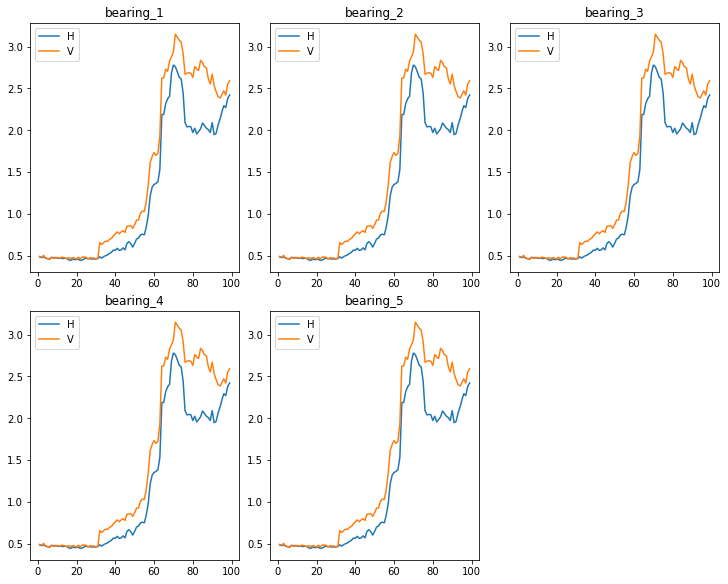

In [2]:

axs = plt.figure(figsize=(10,8), constrained_layout=True).subplots(2, 3).flat
axs[5].remove()
axs=axs[:5]
x = [i for i in range(1,100)]
for b in range(1, 6):
    h_data = []
    v_data = []
    for i in range(1, 100):
        filename = f"./35Hz12kN/Bearing1_2/{i}.csv"
        df = pd.read_csv(filename)
        df = df.rename(columns={"Horizontal_vibration_signals":"H", "Vertical_vibration_signals":"V"})
        h_data.append(df.H.abs().mean())
        v_data.append(df.V.abs().mean())
    p = axs[b-1]
    p.plot(x, h_data, label="H")
    p.plot(x, v_data, label="V")
    p.set_title(f"bearing_{b}")
    p.legend()


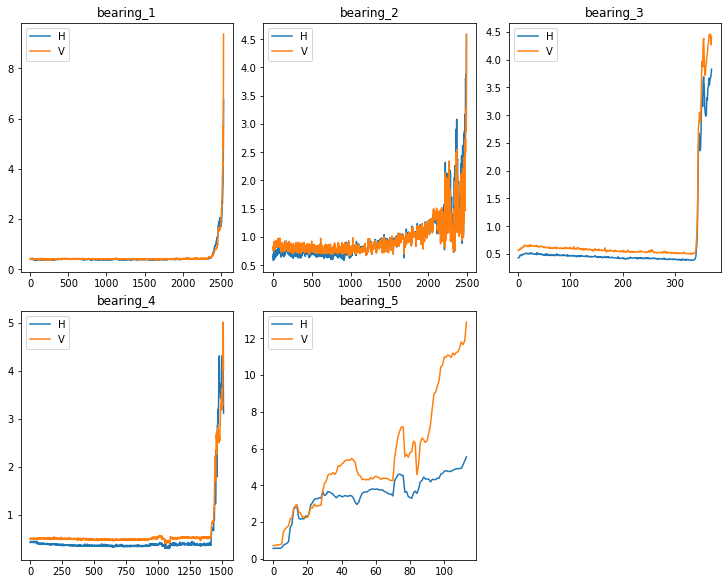

In [3]:

import os
axs = plt.figure(figsize=(10,8), constrained_layout=True).subplots(2, 3).flat
axs[5].remove()
axs=axs[:5]

for b in range(1, 6):
    h_data = []
    v_data = []
    folder_path = f"./40Hz10kN/Bearing3_{b}"
    files = os.listdir(folder_path)
    sorted_files = []
    for f in files:
        if not f.endswith(".csv"):
            continue
        sorted_files.append((f, int(f.split(".")[0])))
    sorted_files = sorted(sorted_files, key=lambda x:x[1])
    x = [i for i in range(len(sorted_files))]
    for f in sorted_files:
        filename = f"{folder_path}/{f[1]}.csv"
        df = pd.read_csv(filename)
        df = df.rename(columns={"Horizontal_vibration_signals":"H", "Vertical_vibration_signals":"V"})
        h_data.append(df.H.abs().mean())
        v_data.append(df.V.abs().mean())
    p = axs[b-1]
    p.plot(x, h_data, label="H")
    p.plot(x, v_data, label="V")
    p.set_title(f"bearing_{b}")
    p.legend()

In [24]:
def show_fft(filename):
    plt.figure(figsize=(16,4))
    df = pd.read_csv(filename)
    df = df.rename(columns={"Horizontal_vibration_signals":"H", "Vertical_vibration_signals":"V"})
    data = df.H[:200]
    y = np.fft.rfft(data)
    x = np.fft.rfftfreq(len(data))
    plt.plot(x, np.abs(y))
    plt.xlabel("Freq")
    plt.ylabel("Ampl")
    plt.show()

def show_ts(filename, a =0, b=-1):
    plt.figure(figsize=(30,4))
    df = pd.read_csv(filename)
    df = df.rename(columns={"Horizontal_vibration_signals":"H", "Vertical_vibration_signals":"V"})
    y = df.H[a:b]
    x = np.arange(0, 1.28, 1.0/25600)[a:b]
    plt.plot(x, y)
    plt.show()

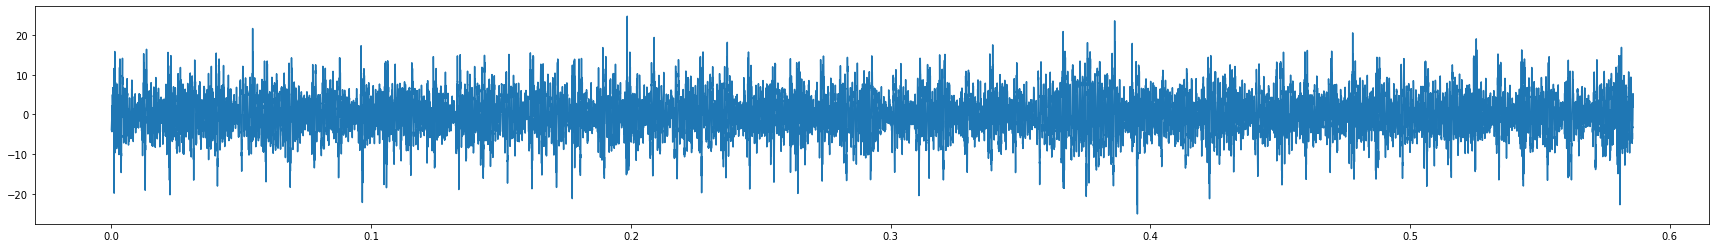

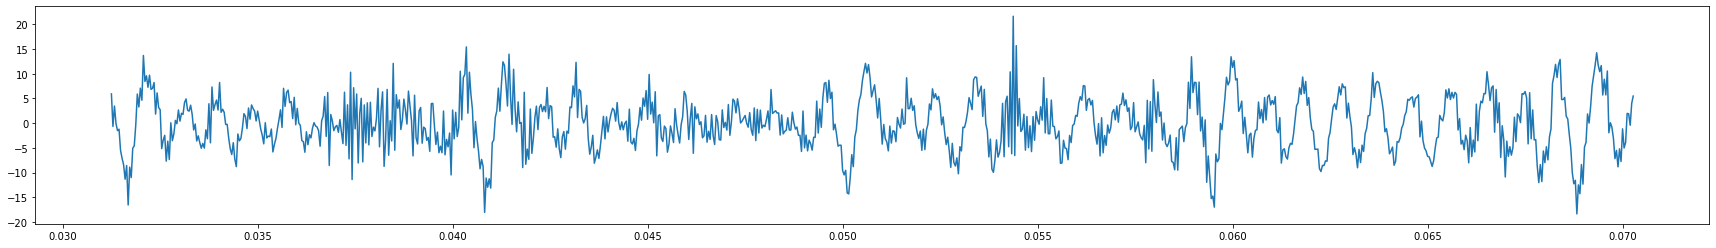

In [32]:
show_ts("./35Hz12kN/Bearing1_2/160.csv", 0, 15000)
show_ts("./35Hz12kN/Bearing1_2/160.csv", 800, 1800)

129.44271909999162


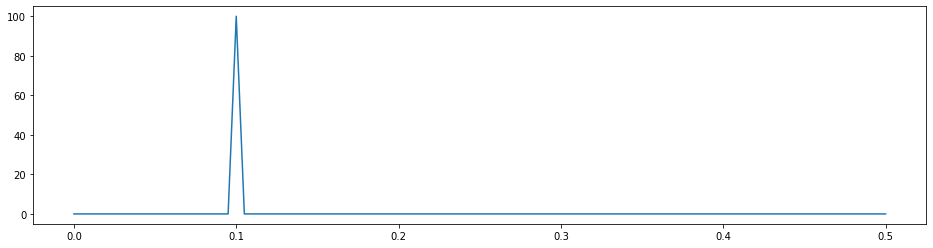

In [6]:
data = [np.cos(np.pi * i * 0.2) for i in range(200)]
print(np.sum(np.abs(data)))
y = np.fft.rfft(data)
x = np.fft.rfftfreq(len(data))
plt.figure(figsize=(16,4))
plt.plot(x, np.abs(y))

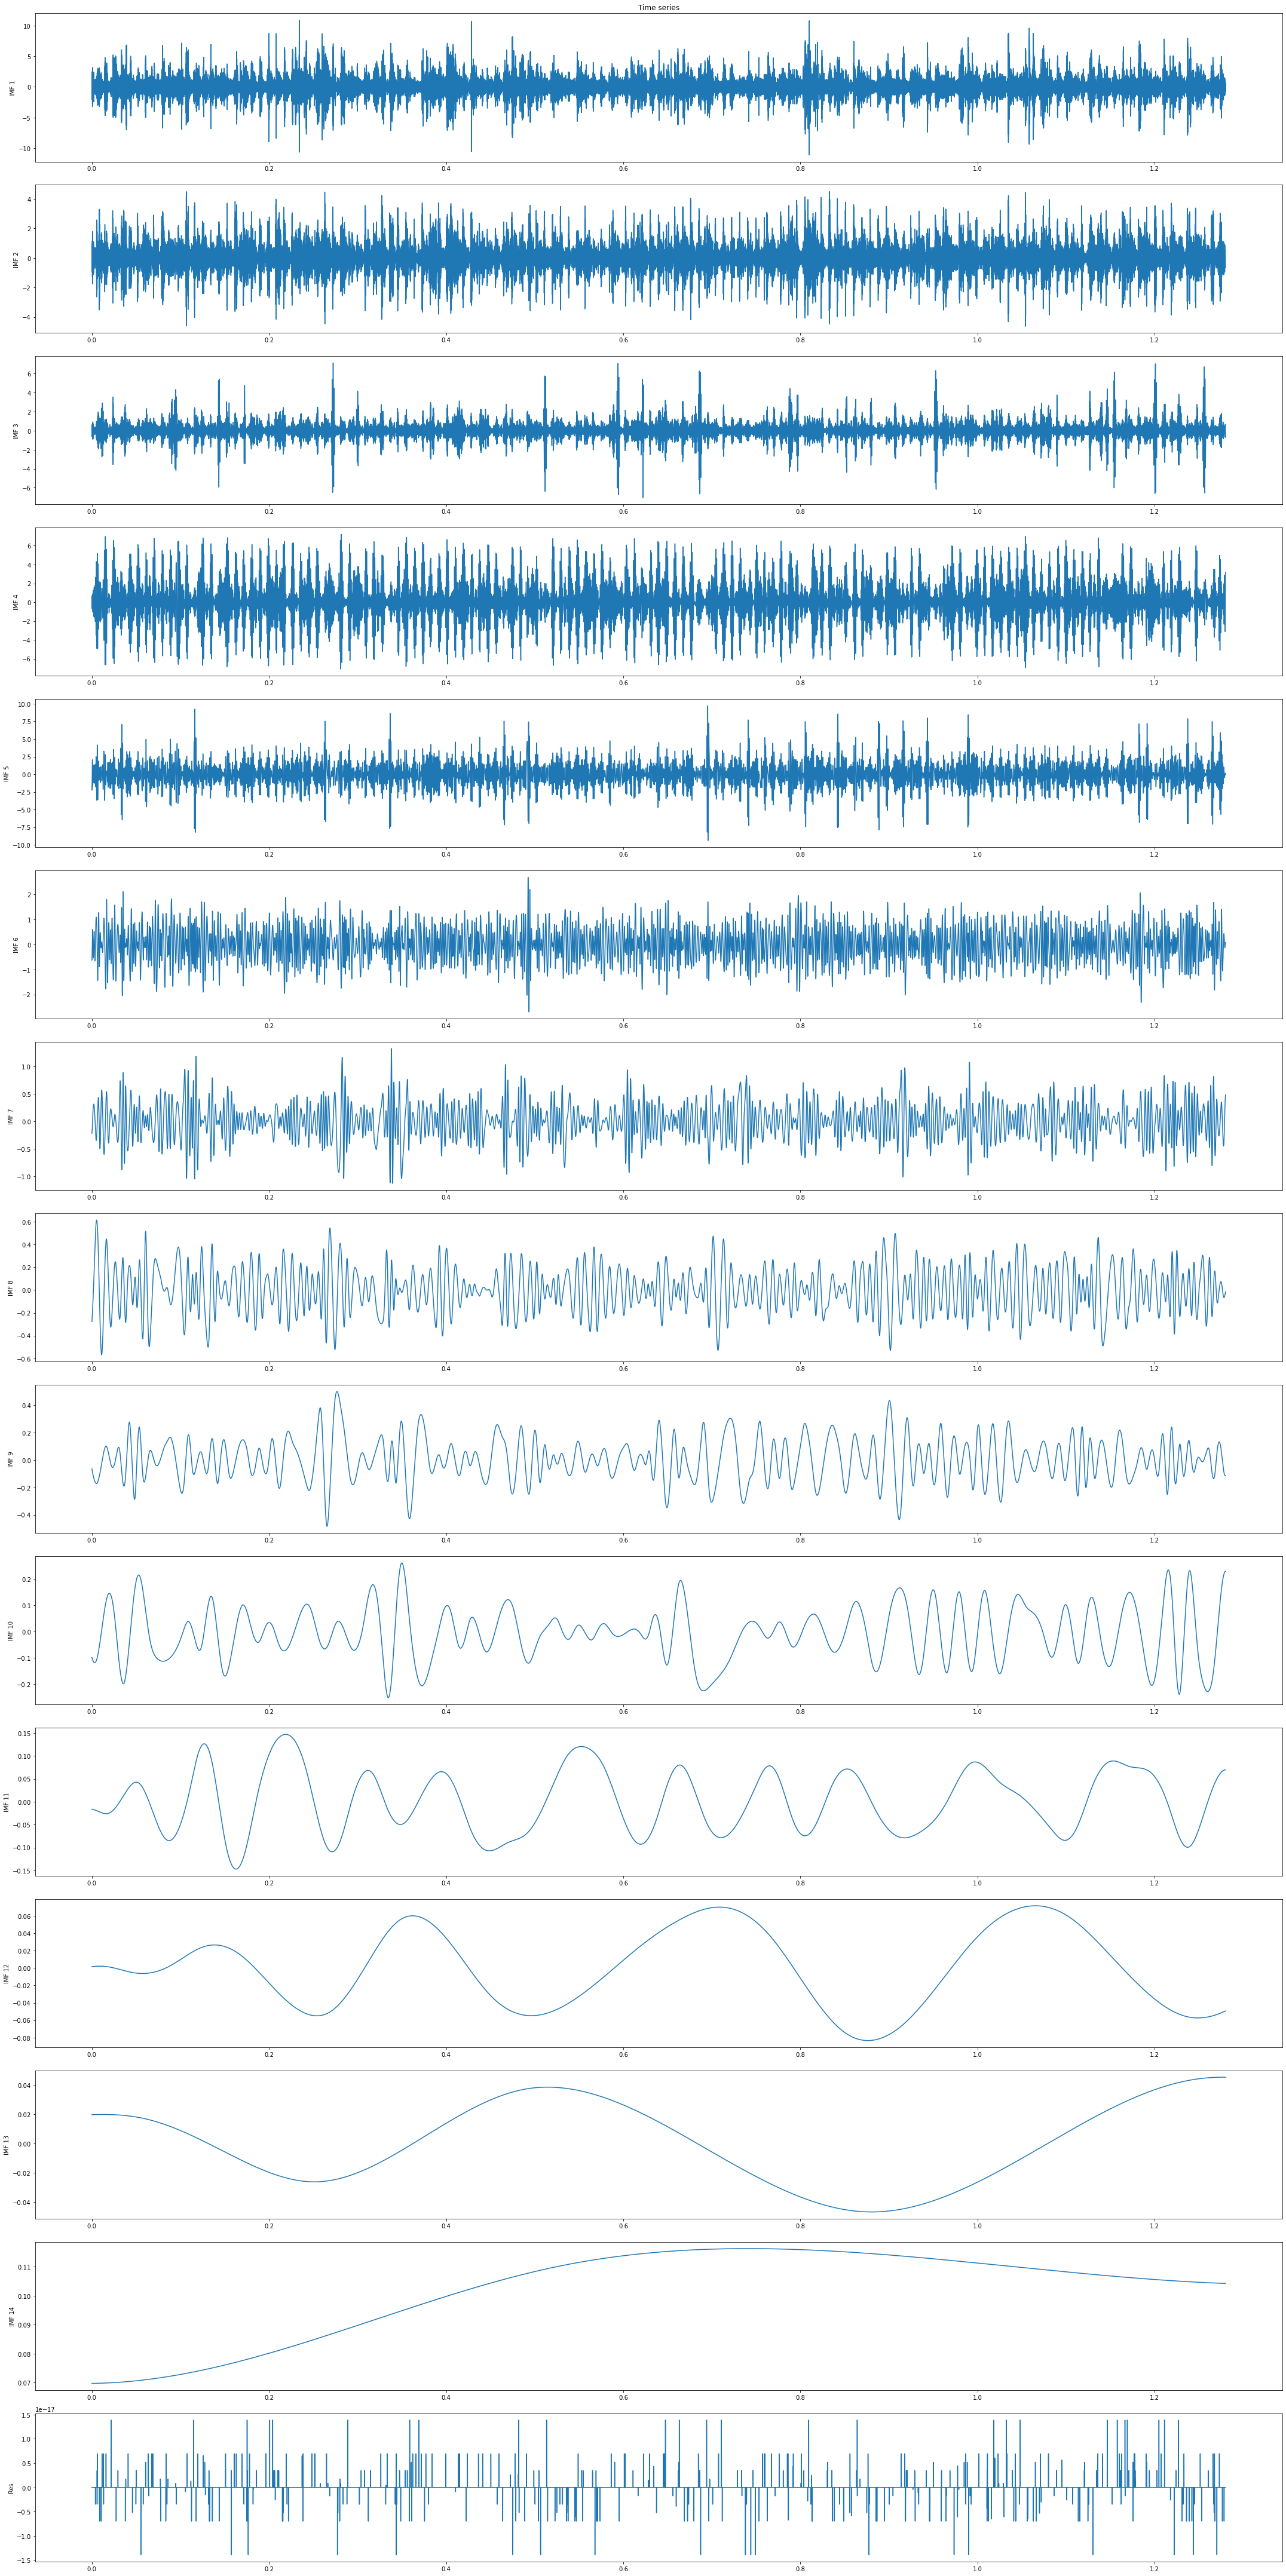

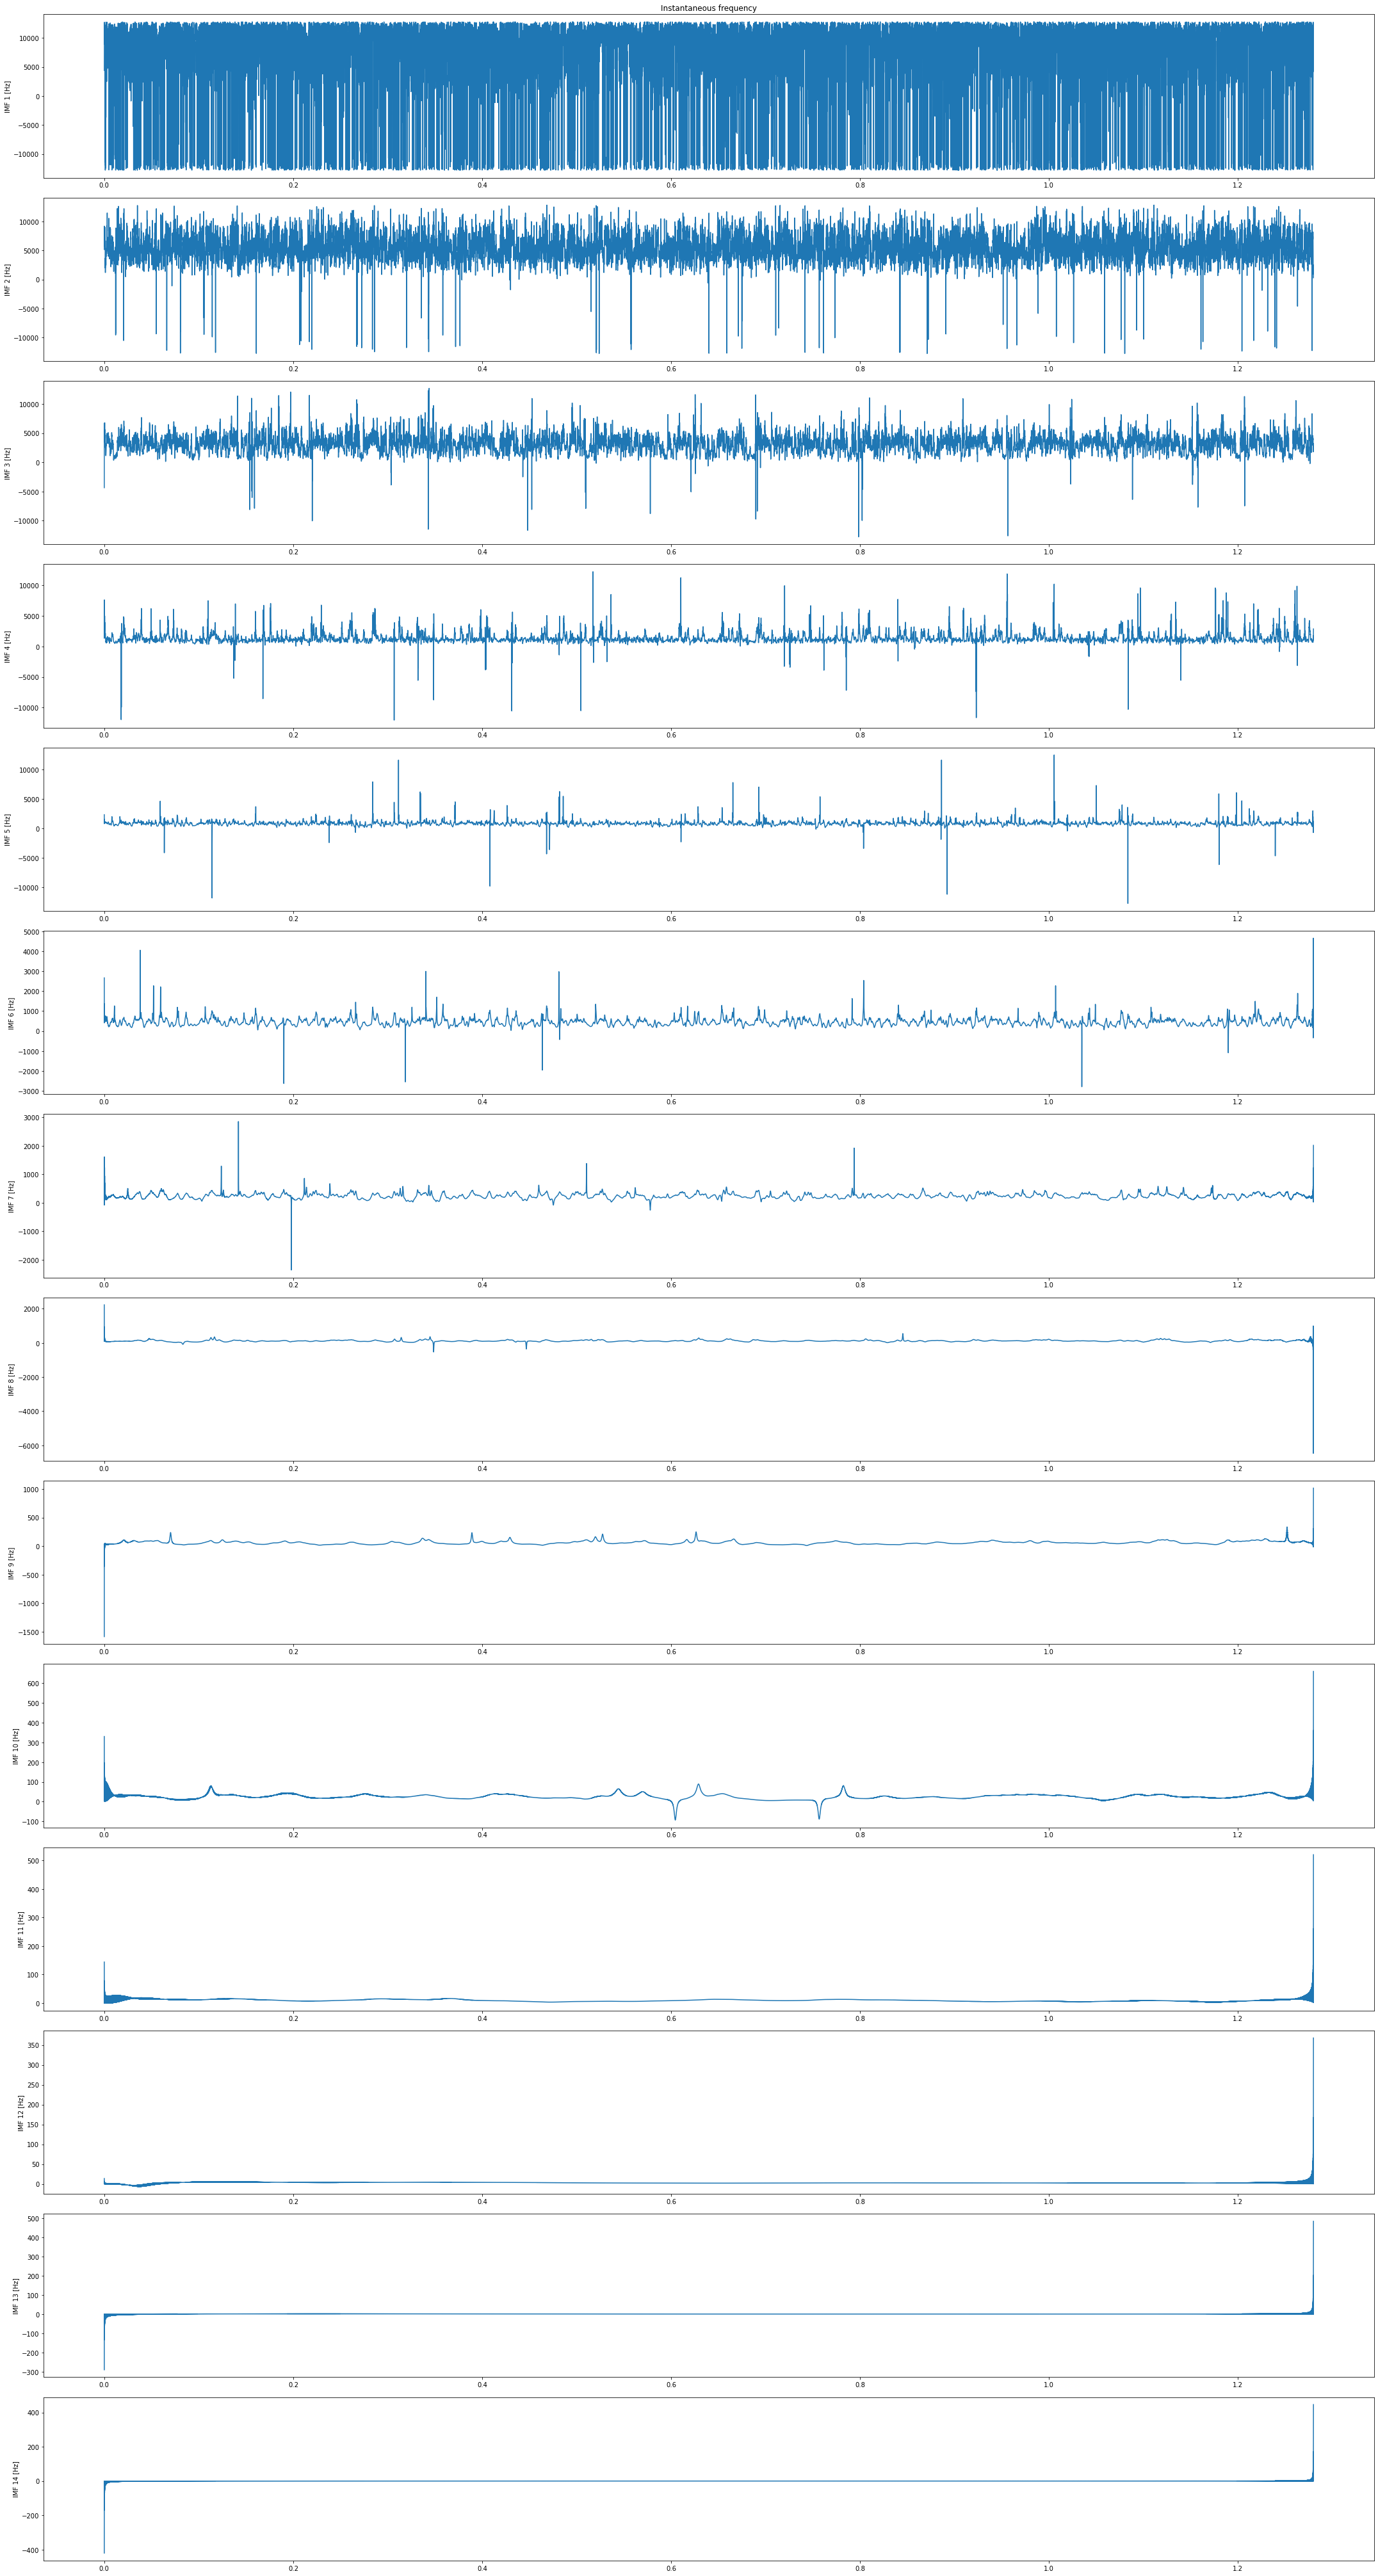

In [7]:
filename = "./35Hz12kN/Bearing1_1/120.csv"
df = pd.read_csv(filename)
df = df.rename(columns={"Horizontal_vibration_signals":"H", "Vertical_vibration_signals":"V"})
data = df.H[0:32768].to_numpy()
emd = EMD()
emd.emd(data)
imfs, res = emd.get_imfs_and_residue()

# In general:
#components = EEMD()(S)
#imfs, res = components[:-1], components[-1]
t = np.arange(0, 1.28, 1/25600)
vis = Visualisation()
vis.PLOT_WIDTH=30
vis.PLOT_HEIGHT_PER_IMF = 4
vis.plot_imfs(imfs=imfs, residue=res, t=t, include_residue=True)
vis.plot_instant_freq(t, imfs=imfs)
vis.show()